# **Trabajo de Simulacion 2: El problema del coleccionista de cartas**

---



# `**Lorenzo, Mariela**`




`# Simulación `


En este Trabajo de Simulación, vamos a estudiar qué ocurre con un problema que alguna vez, casi con seguridad, nos tocó de cerca: ¡llenar un álbum de figuritas! E, incluso, vamos someter a prueba esa intuición que todos los que alguna vez coleccionamos figuritas tenemos: ¿hay figuritas difíciles?

Para esta simulación, vamos a programar un problema clásico: el _coupon collector's problem_.

El problema del _coupon collector_, en realidad, tiene una formulación equivalente pero mucho más interesante: imaginemos que queremos llenar un álbum de figuritas (¡el del Mundial 2022!, que luego de haber salido campeones es **ideal** para coleccionar, ¿no?), ¿cuántos paquetes, en promedio, necesitamos comprar para conseguirlo?

![picture](https://drive.google.com/uc?export=view?&id=1dBOv8mz-ZYT9XmYsAHr181ow1RVsHKNS)

# `Simulación con contenidos extra`

`N = 1000 repeticiones`

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

      ⭐⭐⭐ Bienvenid@ a la SIMULACIÓN DE MONTE CARLO (Qatar 2022) ⭐⭐⭐

          El Problema del Coleccionista de Cupones - Coupon Collector's Problem 

  En el campo de la probabilidad este conocido problema cuantifica cuántos intentos se necesitan, en promedio, para obtener una colección completa.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

      Primero, 🩵🤍🩵 🥇 ARGENTINA TRICAMPEÓN 🏆🩵🤍🩵


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Primero: La definición de Parámetros del Problema ---


El

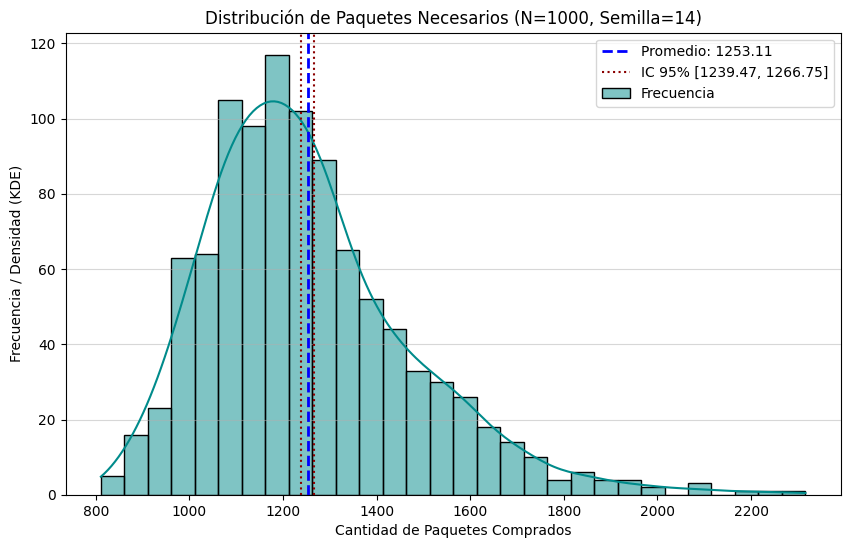

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--- 🎯 Noveno: Distribución Uniforme y Variables Continuas (Función de Densidad) ---


  El modelo uniforme es el más simple para variables aleatorias continuas. Aquí, introducimos el concepto de Función de Densidad de Probabilidad (PDF), ya que la probabilidad en un punto $P(X=x)$ es cero.

1. Función de Densidad de Probabilidad (PDF) en f(x=15):
   El valor de la densidad en x=15 es: **0.10**
   (La altura de la caja es 1/(b-a) = 1/(20-10) = 0.10)

2. Función de Distribución Acumulada (CDF) en P(X ≤ 17.5):
   P(X ≤ 17.5) = **0.75**
   (Representa el área del rectángulo desde 10 hasta 17.5: 0.75)

4. Esperanza y Varianza Teórica:
   Esperanza E[X] = (a+b)/2 = **15.0**
   Varianza Var[X] = (b-a)²/12 = **8.33**
------------------------------------------------------------------------------------

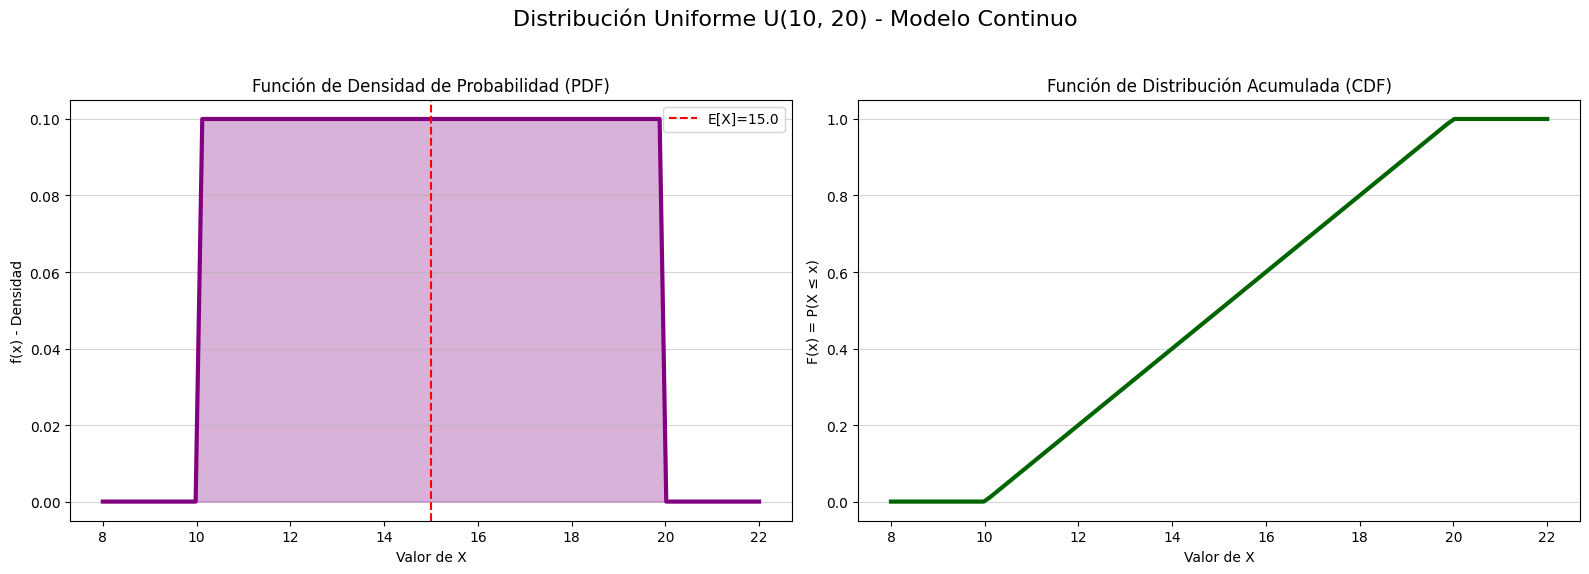

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--- 🎯 Décimo: Distribuciones Clásicas y Probabilidad Puntual (con Esperanza y Varianza) ---



--- Para homenajear a uno de los mejores número 10 que tuvo la selección, calcularemos probabilidades sobre la figurita más anhelada, la del diez de la selección, Lio Messi ---


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. Probabilidad Puntual que salga la Figurita de Messi (Figu N° 19)
------------------------------------------------------------------------------
P(una figura al azar es Messi) = **0.00116**
P(el paquete de 5 trae a Messi) = **0.00581**
------------------------------------------------------------------------------
----------------

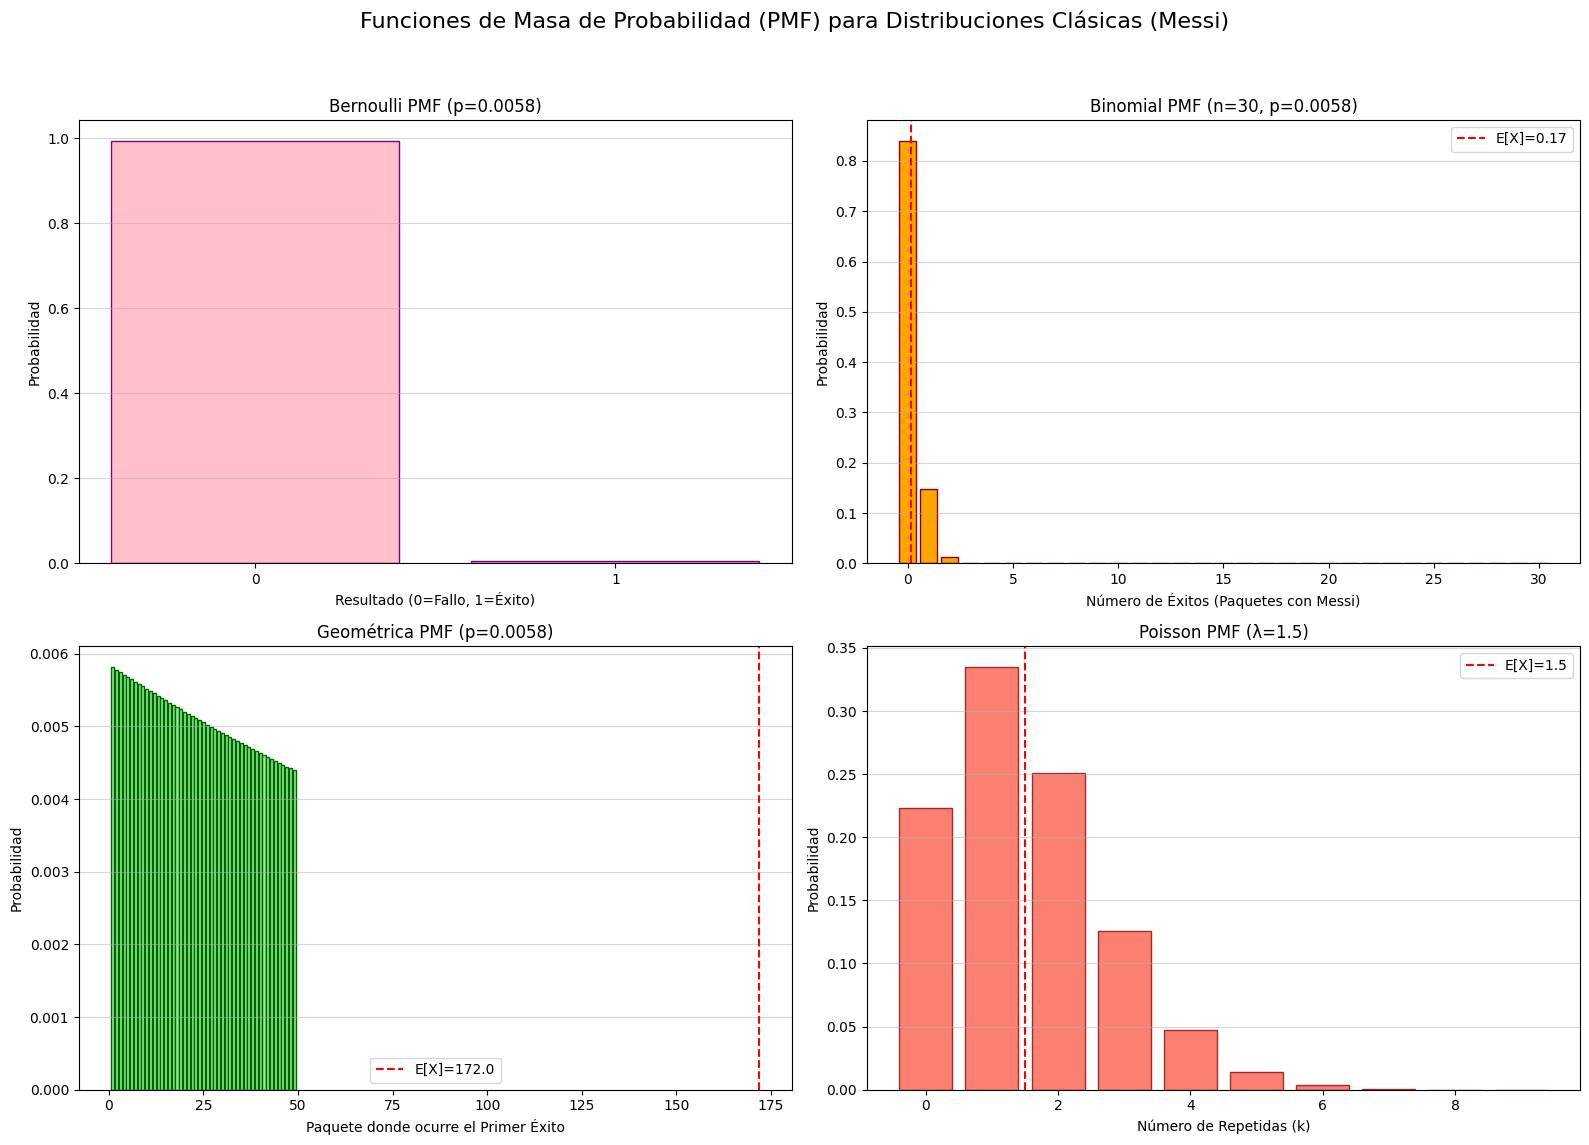




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--- 📊 Gráficos: Funciones de Distribución Acumulada (Discretas) ---

 📈 Estos gráficos muestran las probabilidades acumuladas P(X ≤ k) para las distribuciones discretas.



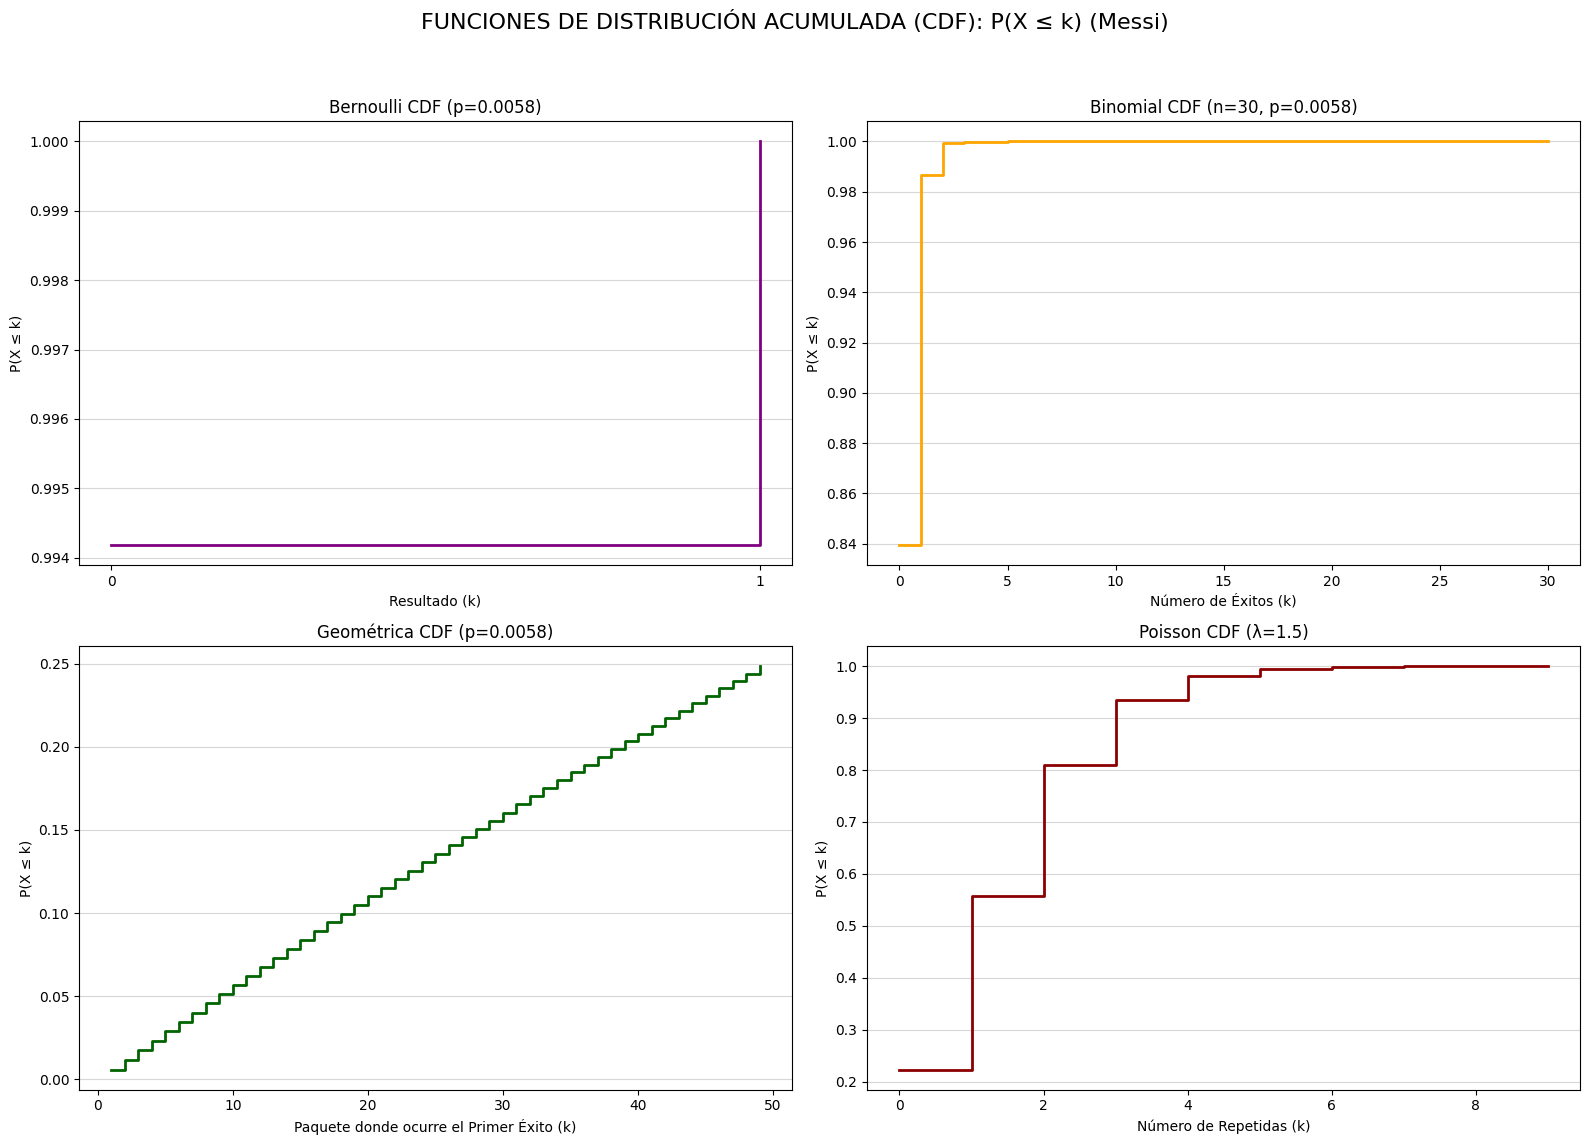




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


¡Simulación y Análisis finalizado! 🎉


In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns


# ----------------------------------------------------------------------
# Inicio & Bienvenida
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("      ⭐⭐⭐ Bienvenid@ a la SIMULACIÓN DE MONTE CARLO (Qatar 2022) ⭐⭐⭐\n")
print("          El Problema del Coleccionista de Cupones - Coupon Collector's Problem \n")
print("  En el campo de la probabilidad este conocido problema cuantifica cuántos intentos se necesitan, en promedio, para obtener una colección completa.\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# ----------------------------------------------------------------------
# Definición de Parámetros
# ----------------------------------------------------------------------

print("      Primero, 🩵🤍🩵 🥇 ARGENTINA TRICAMPEÓN 🏆🩵🤍🩵\n\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

print("--- Primero: La definición de Parámetros del Problema ---\n\n")

FIGUS_TOTAL = 860
FIGUS_PAQUETE = 5
N_REPETICIONES = 1000 # Mantenemos 1000 para la precisión

print(f"El álbum de Qatar 2022 de Panini tiene {FIGUS_TOTAL} figuritas.\n")
print(f"Cada paquete trae {FIGUS_PAQUETE} figuritas (sin repetición dentro del paquete según el fabricante).\n")
print(f"La simulación se repetirá N = {N_REPETICIONES} veces para obtener una estimación del promedio.\n")

# ----------------------------------------------------------------------
# EXPERIMENTO ALEATORIO: Funciones Auxiliares
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n Segundo: Francia jaja.\n\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- Segundo Paso: Definición de Funciones Auxiliares ---\n\n")

def crear_album(figus_total):
    """Inicializa el álbum como un vector de ceros."""
    return np.zeros(figus_total, dtype=int)
print(" -> Se crea la Función 'crear_album': Para inicializar el álbum como un vector de ceros ( 0 = figurita faltante ).\n")

def comprar_paquete(figus_total, figus_paquete):
    """Genera un paquete de figuritas al azar sin repetición."""
    return rd.sample(range(figus_total), figus_paquete)

def pegar_figus(album, paquete):
    """Completa con un 1 las figuritas del álbum que hayan tocado."""
    for figu in paquete:
        album[figu] = 1

def album_incompleto(album):
    """Devuelve True si el álbum tiene al menos un cero (está incompleto)."""
    return 0 in album

def combinations(n, k):
    """Calcula el coeficiente binomial C(n, k)"""
    if k < 0 or k > n: return 0
    if k == 0 or k == n: return 1
    if k > n // 2: k = n - k
    return round(math.exp(math.lgamma(n + 1) - math.lgamma(k + 1) - math.lgamma(n - k + 1)))

# ----------------------------------------------------------------------
# EXPERIMENTO ALEATORIO: Función Principal cuantos_paquetes
# ----------------------------------------------------------------------

def cuantos_paquetes(figus_total, figus_paquete):
    """Simula el llenado de un álbum - devuelve la cantidad de paquetes comprados."""
    album = crear_album(figus_total)
    paquetes_comprados = 0

    while album_incompleto(album):
        paquete = comprar_paquete(figus_total, figus_paquete)
        pegar_figus(album, paquete)
        paquetes_comprados += 1

    return paquetes_comprados

# ----------------------------------------------------------------------
# MUESTRA ALEATORIA Y CONFIGURACIÓN DE SEMILLA
# ----------------------------------------------------------------------

def simular_albumes(N, figus_total, figus_paquete, semilla):
    """Ejecuta N simulaciones."""
    rd.seed(semilla)
    np.random.seed(semilla)

    muestras = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]
    promedio_estimado = np.mean(muestras)

    return promedio_estimado, muestras

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- Tercero: Solicitud de Semilla y Reproducibilidad ---\n\n")

while True:
    try:
        semilla_str = input("Por favor, ingrese la SEMILLA (un número entero) para la simulación: ")
        SEMILLA_ELEGIDA = int(semilla_str)
        break
    except ValueError:
        print("❌ Entrada no válida. Debe ser un número entero. Intente de nuevo.")

print(f"✔️ Semilla de simulación establecida en: {SEMILLA_ELEGIDA}\n\n")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# Ejecutar la simulación
print("\n--- Ejecución de la Simulación ---\n\n")
print(f"Ejecutando el experimento {N_REPETICIONES} veces...\n")
promedio_paquetes, muestras = simular_albumes(
    N_REPETICIONES, FIGUS_TOTAL, FIGUS_PAQUETE, SEMILLA_ELEGIDA
)
print(f"Hemos generado {len(muestras)} resultados individuales.\n")

# ----------------------------------------------------------------------
# DETALLE DE LAS MUESTRAS EN TABLA
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- Cuarto: Detalle de las Muestras de la Simulación ---\n\n")
# NOTA CLAVE: La tabla solo mostrará las primeras 300 de las 1000 muestras totales.
N_MUESTRAS_A_MOSTRAR = 300
print(f"⚠️ Se generaron {N_REPETICIONES} muestras. Se muestra una tabla con las primeras {N_MUESTRAS_A_MOSTRAR} para legibilidad.\n")
print(f"Mínimo de paquetes: {min(muestras)}, Máximo de paquetes: {max(muestras)}\n")

columnas = 10
filas = N_MUESTRAS_A_MOSTRAR // columnas
headers = []
for i in range(columnas):
    inicio = i * filas + 1
    fin = (i + 1) * filas
    headers.append(f'Rep.{inicio}-{fin}')

header_line = "| " + " | ".join([f"{h:<10}" for h in headers]) + " |"
separator_line = "+-" + "-+--".join(["-"*10 for _ in headers]) + "-+"

print(separator_line)
print(header_line)
print(separator_line)

# Solo se itera sobre las primeras 'filas' para un total de 300 muestras
for i in range(filas):
    row_data = []
    for j in range(columnas):
        indice = j * filas + i
        # Aseguramos no intentar acceder a un índice fuera del rango de las 300
        if indice < N_MUESTRAS_A_MOSTRAR:
             valor = muestras[indice]
             row_data.append(f"{valor:<10}")

    if row_data:
        data_line = "| " + " | ".join(row_data) + " |"
        print(data_line)

print(separator_line)

# ------------------------------------------------------------------------
# ESPERANZA Y ANÁLISIS ESTADÍSTICO DE LOS PROMEDIOS (Muestras)
# ------------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- Quinto: Esperanza e Intervalo de Confianza ---\n\n")

print(f"Esperanza Simulada (Promedio Muestral): {promedio_paquetes:.2f} paquetes\n")

# Cálculo Teórico Simplificado
gamma = 0.57721
esperanza_teorica = (FIGUS_TOTAL / FIGUS_PAQUETE) * (math.log(FIGUS_TOTAL) + gamma)
print(f"Esperanza Teórica Aproximada (Modelo Clásico): {esperanza_teorica:.2f} paquetes\n")

# CÁLCULOS ESTADÍSTICOS DE LAS MUESTRAS
varianza_muestras = np.var(muestras)
# El error estándar de la media usa N=1000
std_error = np.std(muestras, ddof=1) / np.sqrt(N_REPETICIONES)

# CÁLCULO DE INTERVALO DE CONFIANZA (IC) del 95% para la Media
ic_inferior, ic_superior = stats.t.interval(
    confidence=0.95,
    df=N_REPETICIONES - 1,
    loc=promedio_paquetes,
    scale=std_error
)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 🎲 Sexto: Análisis Estadístico Intervalo de Confianza (IC del 95%) ---\n\n")

print(f"Esperanza de los promedios (media de 'muestras'):  {promedio_paquetes:<10.2f} ")
print(f"Varianza de los promedios (varianza de 'muestras'): {varianza_muestras:<10.2f}")
print(f"El Intervalo de Confianza (95%) para la Media es: [{ic_inferior:.2f}, {ic_superior:.2f}] paquetes")
print(f"✅ ¡El IC es ahora más estrecho, reflejando una mayor precisión de la estimación! (Gracias a N={N_REPETICIONES})")

# ----------------------------------------------------------------------
# TABLA DE PROBABILIDADES
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- 🎯 Séptimo: Tabla de Probabilidades Simuladas ---\n\n")

umbral = int(promedio_paquetes) + 1
conteo_exitos = sum(1 for paquetes in muestras if paquetes < umbral)
probabilidad_simulada = conteo_exitos / N_REPETICIONES
conteo_fallos = sum(1 for paquetes in muestras if paquetes > umbral)
probabilidad_simulada_mayor = conteo_fallos / N_REPETICIONES
conteo_minimo = sum(1 for paquetes in muestras if paquetes == min(muestras))
probabilidad_simulada_min = conteo_minimo / N_REPETICIONES

print("Evento (N = Paquetes Necesarios)                                | Probabilidad Simulada (Frecuencia)")
print("----------------------------------------------------------------|------------------------------------")
print(f"Completar con menos de {umbral} paquetes                            | {probabilidad_simulada:.2f} ({conteo_exitos}/{N_REPETICIONES})")
print(f"Completar con más de {umbral} paquetes                              | {probabilidad_simulada_mayor:.2f} ({conteo_fallos}/{N_REPETICIONES})")
print(f"Completar con el mínimo ({min(muestras)}) paquetes                           | {probabilidad_simulada_min:.2f} ({conteo_minimo}/{N_REPETICIONES})")


# ----------------------------------------------------------------------
# VISUALIZACIÓN DEL HISTOGRAMA (MONTE CARLO)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Octavo: Gráfico de Distribución de Paquetes Necesarios (Histograma Monte Carlo) ---\n\n")
print(f" 📈 Este histograma muestra la distribución de las {N_REPETICIONES} simulaciones. Curva KDE (densidad).\n\n")

plt.figure(figsize=(10, 6))

# Usamos 'darkcyan' o '#008b8b' para un celeste oscuro.
COLOR_CELESTE_OSCURO = '#008b8b'
COLOR_AZUL_PROMEDIO = 'blue'
COLOR_IC = 'darkred'

# Generación del Histograma simplificada con sns.histplot (incluye KDE)
sns.histplot(
    muestras,
    bins=30, # Usamos 30 bins para una muestra de 1000
    kde=True,
    color=COLOR_CELESTE_OSCURO,
    edgecolor='black',
    label='Frecuencia'
)

# Añade linea del promedio
plt.axvline(promedio_paquetes, color=COLOR_AZUL_PROMEDIO, linestyle='dashed', linewidth=2,
             label=f'Promedio: {promedio_paquetes:.2f}')

# Líneas para el Intervalo de Confianza (IC)
plt.axvline(ic_inferior, color=COLOR_IC, linestyle='dotted', linewidth=1.5,
             label=f'IC 95% [{ic_inferior:.2f}, {ic_superior:.2f}]')
plt.axvline(ic_superior, color=COLOR_IC, linestyle='dotted', linewidth=1.5)

plt.title(f'Distribución de Paquetes Necesarios (N={N_REPETICIONES}, Semilla={SEMILLA_ELEGIDA})')
plt.xlabel('Cantidad de Paquetes Comprados')
plt.ylabel('Frecuencia / Densidad (KDE)')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# ----------------------------------------------------------------------
## DISTRIBUCIÓN UNIFORME Y CONCEPTOS CONTINUOS
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 🎯 Noveno: Distribución Uniforme y Variables Continuas (Función de Densidad) ---\n\n")
print("  El modelo uniforme es el más simple para variables aleatorias continuas. Aquí, introducimos el concepto de Función de Densidad de Probabilidad (PDF), ya que la probabilidad en un punto $P(X=x)$ es cero.\n")

# Parámetros para la distribución uniforme
A_UNIFORME = 10  # Límite inferior
B_UNIFORME = 20  # Límite superior
LOC_UNIFORME = A_UNIFORME
SCALE_UNIFORME = B_UNIFORME - A_UNIFORME

# 1. Función de Densidad de Probabilidad (PDF)
pdf_valor = stats.uniform.pdf(x=15, loc=LOC_UNIFORME, scale=SCALE_UNIFORME)
pdf_altura = 1 / (B_UNIFORME - A_UNIFORME)

print(f"1. Función de Densidad de Probabilidad (PDF) en f(x=15):")
print(f"   El valor de la densidad en x=15 es: **{pdf_valor:.2f}**")
print(f"   (La altura de la caja es 1/(b-a) = 1/({B_UNIFORME}-{A_UNIFORME}) = {pdf_altura:.2f})\n")

# 2. Función de Distribución Acumulada (CDF)
cdf_valor = stats.uniform.cdf(x=17.5, loc=LOC_UNIFORME, scale=SCALE_UNIFORME)
cdf_area = (17.5 - A_UNIFORME) * pdf_altura

print(f"2. Función de Distribución Acumulada (CDF) en P(X ≤ 17.5):")
print(f"   P(X ≤ 17.5) = **{cdf_valor:.2f}**")
print(f"   (Representa el área del rectángulo desde 10 hasta 17.5: {cdf_area:.2f})\n")

# 4. Esperanza (Media) y Varianza
esperanza_uniforme, varianza_uniforme = stats.uniform.stats(loc=LOC_UNIFORME, scale=SCALE_UNIFORME, moments='mv')

print(f"4. Esperanza y Varianza Teórica:")
print(f"   Esperanza E[X] = (a+b)/2 = **{esperanza_uniforme:.1f}**")
print(f"   Varianza Var[X] = (b-a)²/12 = **{varianza_uniforme:.2f}**")

# ----------------------------------------------------------------------
## GRÁFICO DE DISTRIBUCIÓN UNIFORME
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Gráfico de la Función de Densidad de Probabilidad (PDF y CDF) Uniforme ---\n")
print(f" 📊 Visualización de las funciones para la distribución uniforme en el intervalo [a={A_UNIFORME}, b={B_UNIFORME}].\n")

x = np.linspace(A_UNIFORME - 2, B_UNIFORME + 2, 100)
pdf = stats.uniform.pdf(x, loc=LOC_UNIFORME, scale=SCALE_UNIFORME)
cdf = stats.uniform.cdf(x, loc=LOC_UNIFORME, scale=SCALE_UNIFORME)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(f'Distribución Uniforme U({A_UNIFORME}, {B_UNIFORME}) - Modelo Continuo', fontsize=16)

# --- Gráfico PDF (Función de Densidad) ---
axs[0].plot(x, pdf, color='purple', linewidth=3)
axs[0].fill_between(x, pdf, color='purple', alpha=0.3)
axs[0].set_title('Función de Densidad de Probabilidad (PDF)')
axs[0].set_xlabel('Valor de X')
axs[0].set_ylabel('f(x) - Densidad')
axs[0].axvline(esperanza_uniforme, color='red', linestyle='--', label=f'E[X]={esperanza_uniforme:.1f}')
axs[0].legend()
axs[0].grid(axis='y', alpha=0.5)


# --- Gráfico CDF (Función Acumulada) ---
axs[1].plot(x, cdf, color='darkgreen', linewidth=3)
axs[1].set_title('Función de Distribución Acumulada (CDF)')
axs[1].set_xlabel('Valor de X')
axs[1].set_ylabel('F(x) = P(X ≤ x)')
axs[1].grid(axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ----------------------------------------------------------------------
# DISTRIBUCIONES CLÁSICAS Y PROBABILIDAD PUNTUAL (MESSI)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 🎯 Décimo: Distribuciones Clásicas y Probabilidad Puntual (con Esperanza y Varianza) ---\n\n")
print("\n--- Para homenajear a uno de los mejores número 10 que tuvo la selección, calcularemos probabilidades sobre la figurita más anhelada, la del diez de la selección, Lio Messi ---\n\n")

# --- CÁLCULO DE PROBABILIDAD PUNTUAL (P(MESSI) en un paquete) ---
combinaciones_total = combinations(FIGUS_TOTAL, FIGUS_PAQUETE)
combinaciones_sin_messi = combinations(FIGUS_TOTAL - 1, FIGUS_PAQUETE)

prob_no_messi = combinaciones_sin_messi / combinaciones_total
PROB_MESSI_PAQUETE = 1 - prob_no_messi # P(Messi en el paquete)
PROB_MESSI_INDIVIDUAL = 1 / FIGUS_TOTAL # P(una figura al azar es Messi)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("1. Probabilidad Puntual que salga la Figurita de Messi (Figu N° 19)")
print("------------------------------------------------------------------------------")
print(f"P(una figura al azar es Messi) = **{PROB_MESSI_INDIVIDUAL:.5f}**")
print(f"P(el paquete de {FIGUS_PAQUETE} trae a Messi) = **{PROB_MESSI_PAQUETE:.5f}**")
print("------------------------------------------------------------------------------")

# Variables de distribución para graficar
n_intentos = 30
p_exito = PROB_MESSI_PAQUETE
lambda_repetidas = 1.5


# --- DISTRIBUCIÓN BERNOULLI (Éxito de Messi en 1 paquete) ---
prob_bernoulli = p_exito
esperanza_bern = p_exito
varianza_bern = p_exito * (1 - p_exito)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n2. Distribución de Bernoulli ( Éxito de Messi en 1 paquete )")
print("-----------------------------------------------------------------")
print(f"Parámetro: p={p_exito:.5f}")
print(f"P(Éxito) = **{prob_bernoulli:.5f}**")
print(f"Esperanza (E[X]): {esperanza_bern:.5f}")
print(f"Varianza (Var[X]): {varianza_bern:.5f}")

# --- DISTRIBUCIÓN BINOMIAL (Éxitos de Messi en 30 paquetes) ---
k_exitos = 3
esperanza_binom, varianza_binom = stats.binom.stats(n=n_intentos, p=p_exito, moments='mv')
prob_binomial = stats.binom.pmf(k=k_exitos, n=n_intentos, p=p_exito)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n3. Distribución Binomial ( k=3 éxitos en n=30 paquetes )")
print("--------------------------------------------------------------")
print(f"Parámetros: n={n_intentos}, p={p_exito:.5f}")
print(f"P(X=3, n=30) = **{prob_binomial:.5f}**")
print(f"Esperanza (E[X]): {esperanza_binom:.2f}")
print(f"Varianza (Var[X]): {varianza_binom:.4f}")

# --- DISTRIBUCIÓN GEOMÉTRICA (Primer éxito de Messi) ---
k_paquete = 10
p_geometrica = p_exito

esperanza_geom, varianza_geom = stats.geom.stats(p=p_geometrica, moments='mv')
prob_geometrica = stats.geom.pmf(k=k_paquete, p=p_geometrica)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n4. Distribución Geométrica (Primer éxito de Messi en el 10mo paquete)")
print("----------------------------------------------------------------------------")
print(f"Parámetros: p={p_geometrica:.5f}")
print(f"P(X=10) = **{prob_geometrica:.5f}**")
print(f"Esperanza (E[X]): {esperanza_geom:.1f}")
print(f"Varianza (Var[X]): {varianza_geom:.1f}")

# --- DISTRIBUCIÓN DE POISSON (Repetidas con lambda=1.5) ---
k_repetidas = 4

esperanza_poisson, varianza_poisson = stats.poisson.stats(mu=lambda_repetidas, moments='mv')
prob_poisson = stats.poisson.pmf(k=k_repetidas, mu=lambda_repetidas)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n5. Distribución de Poisson ( k=4 repetidas con λ=1.5 )")
print("-------------------------------------------------------------")
print(f"Parámetros: λ={lambda_repetidas:.1f}")
print(f"P(X=4 con λ=1.5) = {prob_poisson:.5f}")
print(f"Esperanza (E[X]): {esperanza_poisson:.1f}")
print(f"Varianza (Var[X]): {varianza_poisson:.1f}")


# ----------------------------------------------------------------------
## 13. GRÁFICOS DE DISTRIBUCIONES TEÓRICAS (PMF Discretas)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Gráficos: Funciones de Masa de Probabilidad (Discretas) ---\n")
print(" 📊 Visualización de las cuatro distribuciones de probabilidad discreta (PMF) para la figurita de Messi.\n")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Funciones de Masa de Probabilidad (PMF) para Distribuciones Clásicas (Messi)', fontsize=16)

# --- 1. Gráfico Bernoulli ---
x_bern = [0, 1]
pmf_bern = [1 - p_exito, p_exito]
axs[0, 0].bar(x_bern, pmf_bern, color='pink', edgecolor='purple')
axs[0, 0].set_xticks(x_bern)
axs[0, 0].set_title(f'Bernoulli PMF (p={p_exito:.4f})')
axs[0, 0].set_xlabel('Resultado (0=Fallo, 1=Éxito)')
axs[0, 0].set_ylabel('Probabilidad')
axs[0, 0].grid(axis='y', alpha=0.5)

# --- 2. Gráfico Binomial ---
x_binom = np.arange(0, n_intentos + 1)
pmf_binom = stats.binom.pmf(x_binom, n_intentos, p_exito)
axs[0, 1].bar(x_binom, pmf_binom, color='orange', edgecolor='darkred')
axs[0, 1].set_title(f'Binomial PMF (n={n_intentos}, p={p_exito:.4f})')
axs[0, 1].set_xlabel('Número de Éxitos (Paquetes con Messi)')
axs[0, 1].set_ylabel('Probabilidad')
axs[0, 1].axvline(esperanza_binom, color='red', linestyle='--', label=f'E[X]={esperanza_binom:.2f}')
axs[0, 1].legend()
axs[0, 1].grid(axis='y', alpha=0.5)

# --- 3. Gráfico Geométrica ---
x_geom = np.arange(1, 50)
pmf_geom = stats.geom.pmf(x_geom, p_exito)
axs[1, 0].bar(x_geom, pmf_geom, color='lightgreen', edgecolor='darkgreen')
axs[1, 0].set_title(f'Geométrica PMF (p={p_exito:.4f})')
axs[1, 0].set_xlabel('Paquete donde ocurre el Primer Éxito')
axs[1, 0].set_ylabel('Probabilidad')
axs[1, 0].axvline(esperanza_geom, color='red', linestyle='--', label=f'E[X]={esperanza_geom:.1f}')
axs[1, 0].legend()
axs[1, 0].grid(axis='y', alpha=0.5)

# --- 4. Gráfico Poisson (PMF) ---
lambda_plot = lambda_repetidas
x_poisson = np.arange(0, 10)
pmf_poisson = stats.poisson.pmf(x_poisson, lambda_plot)
axs[1, 1].bar(x_poisson, pmf_poisson, color='salmon', edgecolor='brown')
axs[1, 1].set_title(f'Poisson PMF (λ={lambda_plot:.1f})')
axs[1, 1].set_xlabel('Número de Repetidas (k)')
axs[1, 1].set_ylabel('Probabilidad')
axs[1, 1].axvline(esperanza_poisson, color='red', linestyle='--', label=f'E[X]={esperanza_poisson:.1f}')
axs[1, 1].legend()
axs[1, 1].grid(axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n\n")

# ----------------------------------------------------------------------
## GRÁFICOS DE DISTRIBUCIONES TEÓRICAS (CDF Discretas)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Gráficos: Funciones de Distribución Acumulada (Discretas) ---\n")
print(" 📈 Estos gráficos muestran las probabilidades acumuladas P(X ≤ k) para las distribuciones discretas.\n")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('FUNCIONES DE DISTRIBUCIÓN ACUMULADA (CDF): P(X ≤ k) (Messi)', fontsize=16)

# --- 1. Gráfico Bernoulli ---
x_bern_cdf = [0, 1]
cdf_bern = stats.bernoulli.cdf(x_bern_cdf, p_exito)
axs[0, 0].step(x_bern_cdf, cdf_bern, where='post', color='purple', linewidth=2)
axs[0, 0].set_xticks(x_bern_cdf)
axs[0, 0].set_title(f'Bernoulli CDF (p={p_exito:.4f})')
axs[0, 0].set_xlabel('Resultado (k)')
axs[0, 0].set_ylabel('P(X ≤ k)')
axs[0, 0].grid(axis='y', alpha=0.5)

# --- 2. Gráfico Binomial  ---
x_binom_cdf = np.arange(0, n_intentos + 1)
cdf_binom = stats.binom.cdf(x_binom_cdf, n_intentos, p_exito)
axs[0, 1].step(x_binom_cdf, cdf_binom, where='post', color='orange', linewidth=2)
axs[0, 1].set_title(f'Binomial CDF (n={n_intentos}, p={p_exito:.4f})')
axs[0, 1].set_xlabel('Número de Éxitos (k)')
axs[0, 1].set_ylabel('P(X ≤ k)')
axs[0, 1].grid(axis='y', alpha=0.5)

# --- 3. Gráfico Geométrica  ---
x_geom_cdf = np.arange(1, 50)
cdf_geom = stats.geom.cdf(x_geom_cdf, p_exito)
axs[1, 0].step(x_geom_cdf, cdf_geom, where='post', color='darkgreen', linewidth=2)
axs[1, 0].set_title(f'Geométrica CDF (p={p_exito:.4f})')
axs[1, 0].set_xlabel('Paquete donde ocurre el Primer Éxito (k)')
axs[1, 0].set_ylabel('P(X ≤ k)')
axs[1, 0].grid(axis='y', alpha=0.5)

# --- 4. Gráfico Poisson  ---
x_poisson_cdf = np.arange(0, 10)
cdf_poisson = stats.poisson.cdf(x_poisson_cdf, lambda_repetidas)
axs[1, 1].step(x_poisson_cdf, cdf_poisson, where='post', color='darkred', linewidth=2)
axs[1, 1].set_title(f'Poisson CDF (λ={lambda_repetidas:.1f})')
axs[1, 1].set_xlabel('Número de Repetidas (k)')
axs[1, 1].set_ylabel('P(X ≤ k)')
axs[1, 1].grid(axis='y', alpha=0.5)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n\n")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n¡Simulación y Análisis finalizado! 🎉")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

          ⭐⭐⭐ Bienvenid@ a la SIMULACIÓN DE MONTE CARLO (Qatar 2022) ⭐⭐⭐

            El Problema del Coleccionista de Cupones - Coupon Collector's Problem 

  En el campo de la probabilidad este conocido problema cuantifica cuántos intentos se necesitan, en promedio, para obtener una colección completa.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

      Primero, 🩵🤍🩵 🥇 ARGENTINA TRICAMPEÓN 🏆🩵🤍🩵


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Primero: La definición de Parámetros del Problema --

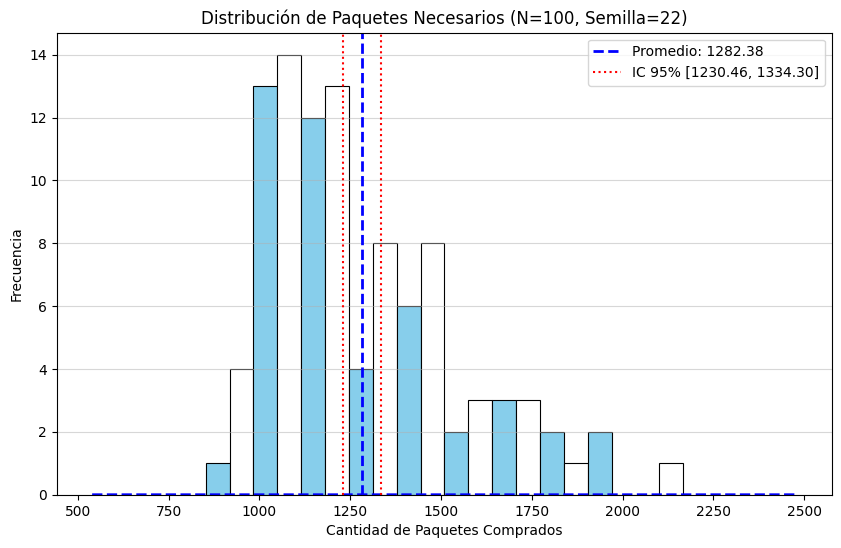

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--- 🎯 Décimo: Distribuciones Clásicas y Probabilidad Puntual (con Esperanza y Varianza) ---



--- Ahora y para homenajear a uno de los mejores número 10 que tuvo la selección, calcularemos probabilidades sobre la figurita más anhelada, la del diez de la selección, Lio Messi ---


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. Probabilidad Puntual que salga la Figurita de Messi (Figu N° 19)
------------------------------------------------------------------------------
P(una figura al azar es Messi) = **0.00116**
P(el paquete de 5 trae a Messi) = **0.00581**
------------------------------------------------------------------------------
--------

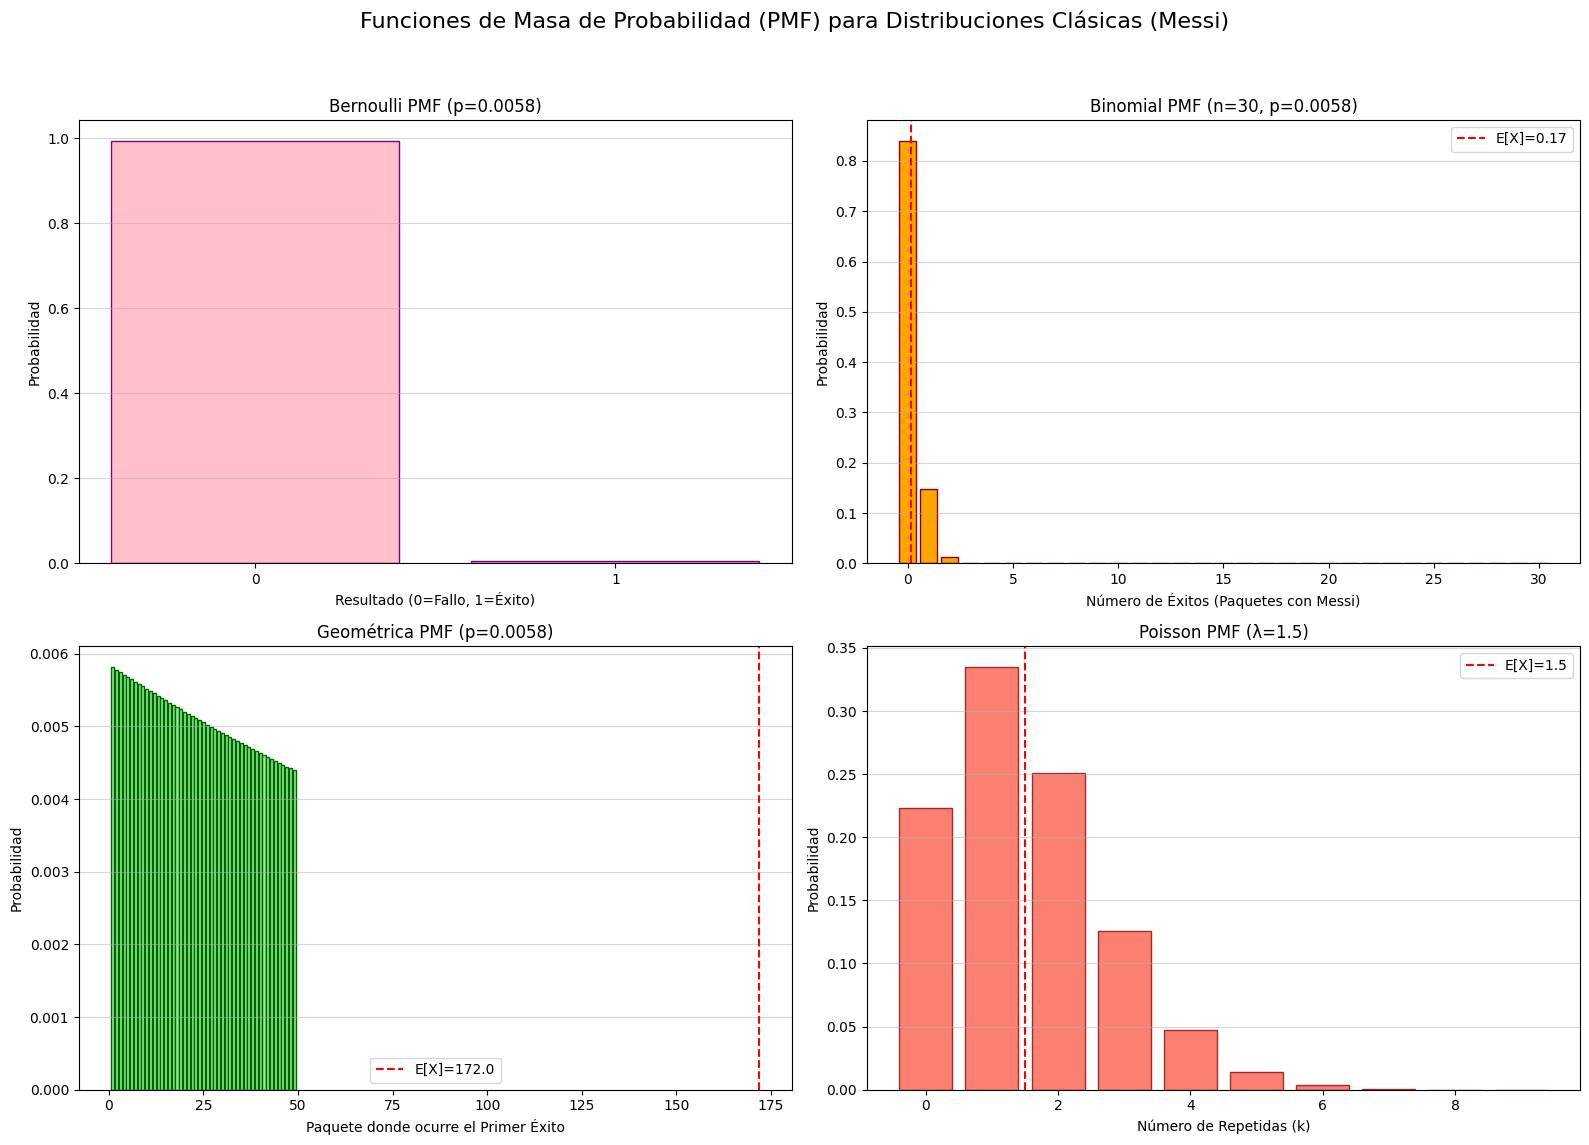




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


--- 📊 Gráficos: Funciones de Distribución Acumulada ---

 📈 Estos gráficos muestran las probabilidades acumuladas P(X ≤ k) para las distribuciones.



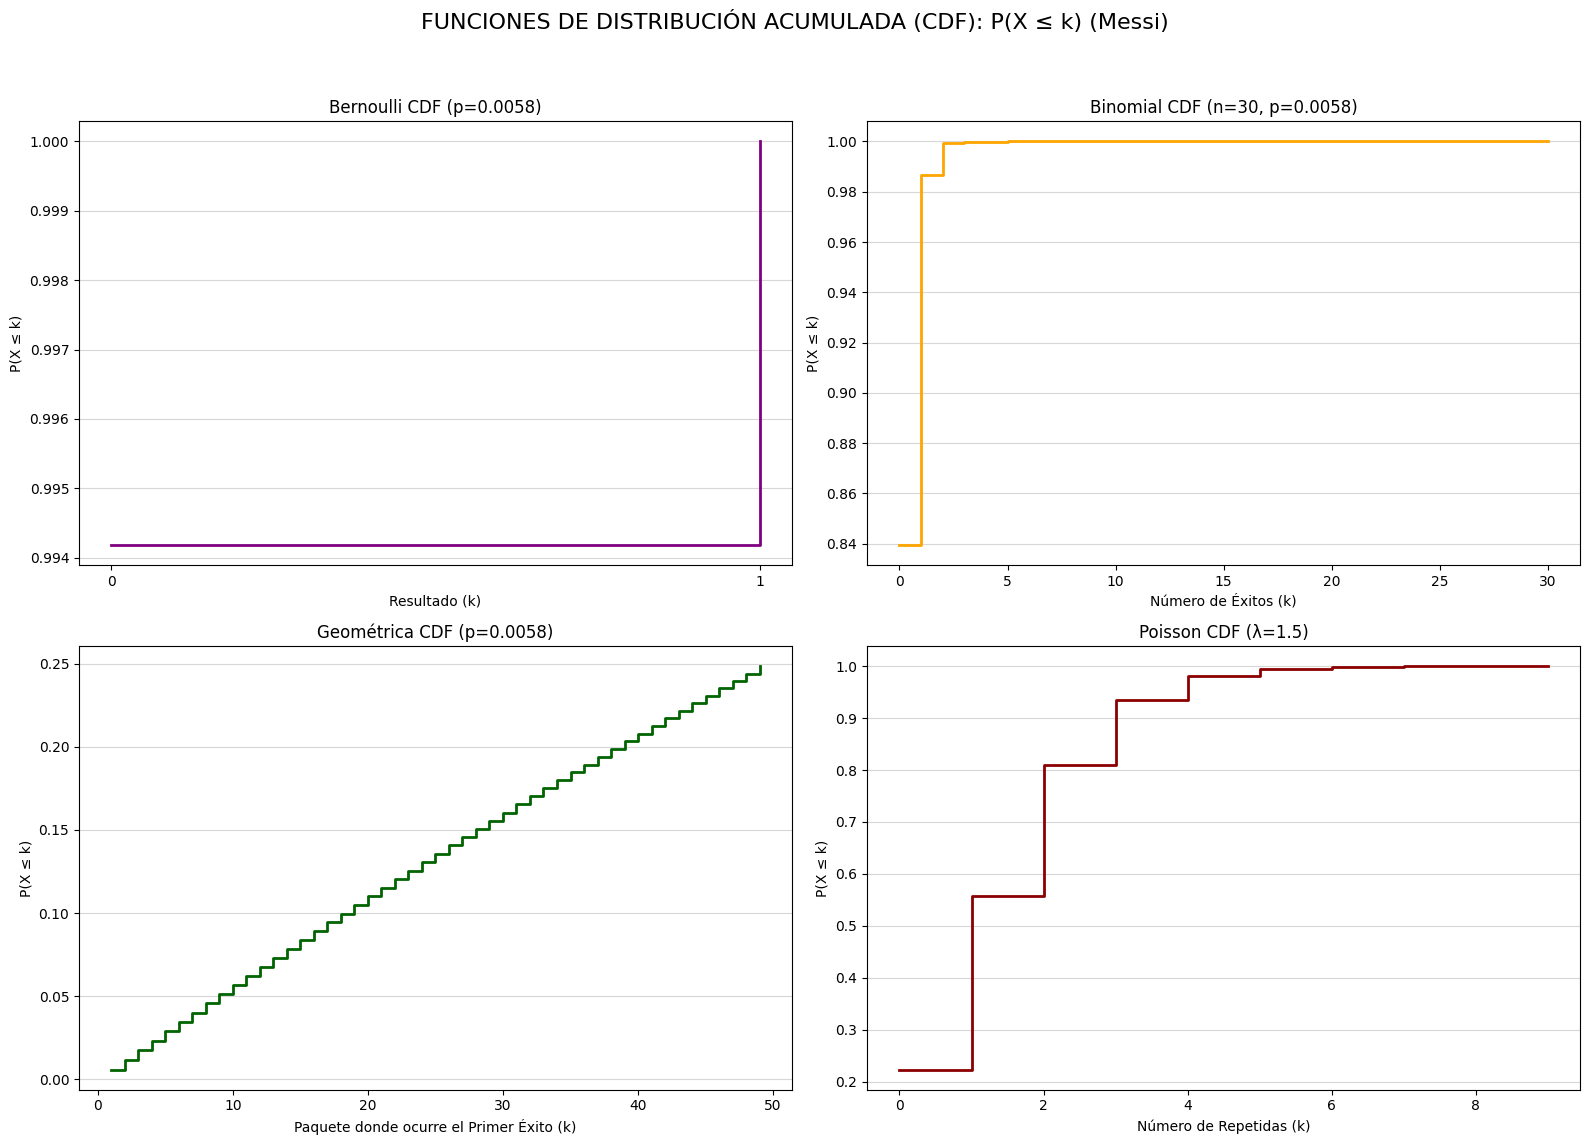




--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


¡Simulación finalizada! 🎉


In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns

# ----------------------------------------------------------------------
# Inicio & Bienvenida
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("          ⭐⭐⭐ Bienvenid@ a la SIMULACIÓN DE MONTE CARLO (Qatar 2022) ⭐⭐⭐\n")
print("            El Problema del Coleccionista de Cupones - Coupon Collector's Problem \n")
print("  En el campo de la probabilidad este conocido problema cuantifica cuántos intentos se necesitan, en promedio, para obtener una colección completa.\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# ----------------------------------------------------------------------
# Definición de Parámetros
# ----------------------------------------------------------------------

print("      Primero, 🩵🤍🩵 🥇 ARGENTINA TRICAMPEÓN 🏆🩵🤍🩵\n\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

print("--- Primero: La definición de Parámetros del Problema ---\n\n")

FIGUS_TOTAL = 860
FIGUS_PAQUETE = 5
N_REPETICIONES = 100

print(f"El álbum de Qatar 2022 de Panini tiene {FIGUS_TOTAL} figuritas.\n")
print(f"Cada paquete trae {FIGUS_PAQUETE} figuritas (sin repetición dentro del paquete según el fabricante).\n")
print(f"La simulación se repetirá N = {N_REPETICIONES} veces para obtener una estimación del promedio.\n")

# ----------------------------------------------------------------------
# EXPERIMENTO ALEATORIO: Funciones Auxiliares
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n Segundo: Francia jaja.\n\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- Segundo Paso: Definición de Funciones Auxiliares ---\n\n")

# Crea un vector (álbum) de figus_total ceros.
def crear_album(figus_total):
    return np.zeros(figus_total, dtype=int)
print(" -> Se crea la Función 'crear_album': Para inicializar el álbum como un vector de ceros ( 0 = figurita faltante ).\n")

# Genera un paquete de figuritas al azar sin repetición
def comprar_paquete(figus_total, figus_paquete):
    return rd.sample(range(figus_total), figus_paquete)

# Completa con un 1 las figuritas del álbum que hayan tocado.
def pegar_figus(album, paquete):
    for figu in paquete:
        album[figu] = 1

# Devuelve True si el álbum tiene al menos un cero (está incompleto).
def album_incompleto(album):
    return 0 in album

# --- Función para Coeficiente Binomial ---
def combinations(n, k):
    """Calcula el coeficiente binomial C(n, k)"""
    if k < 0 or k > n: return 0
    if k == 0 or k == n: return 1
    if k > n // 2: k = n - k
    return round(math.exp(math.lgamma(n + 1) - math.lgamma(k + 1) - math.lgamma(n - k + 1)))

# ----------------------------------------------------------------------
# EXPERIMENTO ALEATORIO: Función Principal cuantos_paquetes
# ----------------------------------------------------------------------

# Simula el llenado de un álbum - devuelve la cantidad de paquetes comprados.
def cuantos_paquetes(figus_total, figus_paquete):
    album = crear_album(figus_total)
    paquetes_comprados = 0

    # Bucle principal: Comprar paquetes hasta que el álbum esté completo.
    while album_incompleto(album):
        paquete = comprar_paquete(figus_total, figus_paquete)
        pegar_figus(album, paquete)
        paquetes_comprados += 1

    return paquetes_comprados

# ----------------------------------------------------------------------
# MUESTRA ALEATORIA Y CONFIGURACIÓN DE SEMILLA
# ----------------------------------------------------------------------

# Ejecuta N simulaciones.
def simular_albumes(N, figus_total, figus_paquete, semilla):
    rd.seed(semilla)
    np.random.seed(semilla)

    # Armar N muestras de cuantos_paquetes.
    muestras = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]
    promedio_estimado = np.mean(muestras)

    return promedio_estimado, muestras

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- Tercero: Solicitud de Semilla y Reproducibilidad ---\n\n")

# --- Solicitud de Semilla al Usuario ---
while True:
    try:
        semilla_str = input("Por favor, ingrese la SEMILLA (un número entero) para la simulación: ")
        SEMILLA_ELEGIDA = int(semilla_str)
        break
    except ValueError:
        print("❌ Entrada no válida. Debe ser un número entero. Intente de nuevo.")

print(f"✔️ Semilla de simulación establecida en: {SEMILLA_ELEGIDA}\n\n")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# Ejecutar la simulación
print("\n--- Cuarto: Ejecución de la Simulación ---\n\n")
print(f"Ejecutando el experimento {N_REPETICIONES} veces...\n")
promedio_paquetes, muestras = simular_albumes(
    N_REPETICIONES, FIGUS_TOTAL, FIGUS_PAQUETE, SEMILLA_ELEGIDA
)
print(f"Hemos generado {len(muestras)} resultados individuales.\n")

# ----------------------------------------------------------------------
# DETALLE DE LAS MUESTRAS EN TABLA
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- Quinto: Detalle de las Muestras de la Simulación ---\n\n")
print("El vector 'muestras' contiene la cantidad de paquetes necesarios para completar el álbum en cada una de las 100 repeticiones simuladas.\n")

columnas = 10
filas = N_REPETICIONES // columnas

# Preparar los encabezados de la tabla
headers = []
for i in range(columnas):
    inicio = i * filas + 1
    fin = (i + 1) * filas
    # Formato para asegurar el encabezado en un ancho fijo
    headers.append(f'Rep.{inicio}-{fin}')

# Imprimir encabezados
header_line = "| " + " | ".join([f"{h:<10}" for h in headers]) + " |"
separator_line = "+-" + "-+--".join(["-"*10 for _ in headers]) + "-+"

print(separator_line)
print(header_line)
print(separator_line)

# Imprimir los datos (filas)
for i in range(filas):
    row_data = []
    for j in range(columnas):
        # Calcular el índice de la muestra
        indice = j * filas + i
        # Obtener el valor de la muestra
        valor = muestras[indice]
        # Formato para asegurar que el valor tiene un ancho fijo
        row_data.append(f"{valor:<10}")

    data_line = "| " + " | ".join(row_data) + " |"
    print(data_line)

print(separator_line)

# ------------------------------------------------------------------------
## 🎲 SEXTO: ESPERANZA Y ANÁLISIS ESTADÍSTICO DE LOS PROMEDIOS (Muestras)
# ------------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 🎲 Sexto: Esperanza e Intervalo de Confianza ---\n\n")

print(f"Esperanza Simulada (Promedio Muestral): {promedio_paquetes:.2f} paquetes\n")

# Cálculo Teórico Simplificado
gamma = 0.57721
esperanza_teorica = (FIGUS_TOTAL / FIGUS_PAQUETE) * (math.log(FIGUS_TOTAL) + gamma)
print(f"Esperanza Teórica Aproximada (Modelo Clásico): {esperanza_teorica:.2f} paquetes\n")

# CÁLCULOS ESTADÍSTICOS DE LAS MUESTRAS
varianza_muestras = np.var(muestras)
std_error = np.std(muestras, ddof=1) / np.sqrt(N_REPETICIONES)

# CÁLCULO DE INTERVALO DE CONFIANZA (IC) del 95% para la Media
ic_inferior, ic_superior = stats.t.interval(
    confidence=0.95,
    df=N_REPETICIONES - 1,
    loc=promedio_paquetes,
    scale=std_error
)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 🎲 Séptimo: Análisis Estadístico Intervalo de Confianza (IC del 95%) ---\n\n")

print(f"Esperanza de los promedios (media de 'muestras'):  {promedio_paquetes:<10.2f} ")
print(f"Varianza de los promedios (varianza de 'muestras'): {varianza_muestras:<10.2f}")
print(f"El Intervalo de Confianza (95%) para la Media es: [{ic_inferior:.2f}, {ic_superior:.2f}] paquetes")

# ----------------------------------------------------------------------
# TABLA DE PROBABILIDADES
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- 🎯 Octavo: Tabla de Probabilidades Simuladas ---\n\n")

# Probabilidad Simulada: P(N < Promedio Estimado)
umbral = int(promedio_paquetes) + 1
conteo_exitos = sum(1 for paquetes in muestras if paquetes < umbral)
probabilidad_simulada = conteo_exitos / N_REPETICIONES

# Probabilidad Simulada: P(N > Promedio Estimado)
conteo_fallos = sum(1 for paquetes in muestras if paquetes > umbral)
probabilidad_simulada_mayor = conteo_fallos / N_REPETICIONES

# Probabilidad Simulada: P(N Mínimo)
conteo_minimo = sum(1 for paquetes in muestras if paquetes == min(muestras))
probabilidad_simulada_min = conteo_minimo / N_REPETICIONES

# Impresión
print("Evento (N = Paquetes Necesarios)                                | Probabilidad Simulada (Frecuencia)")
print("----------------------------------------------------------------|------------------------------------")
print(f"Completar con menos de {umbral} paquetes                            | {probabilidad_simulada:.2f} ({conteo_exitos}/{N_REPETICIONES})")
print(f"Completar con más de {umbral} paquetes                              | {probabilidad_simulada_mayor:.2f} ({conteo_fallos}/{N_REPETICIONES})")
print(f"Completar con el mínimo ({min(muestras)}) paquetes                          | {probabilidad_simulada_min:.2f} ({conteo_minimo}/{N_REPETICIONES})")


# ----------------------------------------------------------------------
## VISUALIZACIÓN DEL HISTOGRAMA (MONTE CARLO)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Noveno: Gráfico de Distribución de Paquetes Necesarios (Histograma Monte Carlo) ---\n\n")
print(" 📈 Este histograma muestra la distribución de las 100 simulaciones para completar el álbum.\n\n")

plt.figure(figsize=(10, 6))

# Definir colores para el histograma
COLOR_CELESTE = '#87CEEB'
COLOR_BLANCO = 'white'
COLOR_BORDE = 'black'
COLOR_AZUL_PROMEDIO = 'blue'
COLOR_IC = 'red'

# Dibuja barras con colores alternos
counts, bins, _ = plt.hist(muestras, bins=20, visible=False)

for i in range(len(counts)):
    bar_color = COLOR_CELESTE if i % 2 == 0 else COLOR_BLANCO
    plt.bar(bins[i], counts[i], width=bins[i+1] - bins[i],
             align='edge',
             color=bar_color,
             edgecolor=COLOR_BORDE,
             linewidth=0.8)

# Añade curva x encima
sns.kdeplot(muestras, color='blue', linewidth=2, linestyle='--', ax=plt.gca())


# Añade linea del promedio
plt.axvline(promedio_paquetes, color=COLOR_AZUL_PROMEDIO, linestyle='dashed', linewidth=2,
             label=f'Promedio: {promedio_paquetes:.2f}')

# Líneas para el Intervalo de Confianza (IC)
plt.axvline(ic_inferior, color=COLOR_IC, linestyle='dotted', linewidth=1.5,
             label=f'IC 95% [{ic_inferior:.2f}, {ic_superior:.2f}]')
plt.axvline(ic_superior, color=COLOR_IC, linestyle='dotted', linewidth=1.5)

plt.title(f'Distribución de Paquetes Necesarios (N={N_REPETICIONES}, Semilla={SEMILLA_ELEGIDA})')
plt.xlabel('Cantidad de Paquetes Comprados')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# ----------------------------------------------------------------------
## DISTRIBUCIONES CLÁSICAS Y PROBABILIDAD PUNTUAL
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 🎯 Décimo: Distribuciones Clásicas y Probabilidad Puntual (con Esperanza y Varianza) ---\n\n")
print("\n--- Ahora y para homenajear a uno de los mejores número 10 que tuvo la selección, calcularemos probabilidades sobre la figurita más anhelada, la del diez de la selección, Lio Messi ---\n\n")

# --- CÁLCULO DE PROBABILIDAD PUNTUAL (P(MESSI) en un paquete) ---
combinaciones_total = combinations(FIGUS_TOTAL, FIGUS_PAQUETE)
combinaciones_sin_messi = combinations(FIGUS_TOTAL - 1, FIGUS_PAQUETE)

prob_no_messi = combinaciones_sin_messi / combinaciones_total
PROB_MESSI_PAQUETE = 1 - prob_no_messi # P(Messi en el paquete)
PROB_MESSI_INDIVIDUAL = 1 / FIGUS_TOTAL # P(una figura al azar es Messi)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("1. Probabilidad Puntual que salga la Figurita de Messi (Figu N° 19)")
print("------------------------------------------------------------------------------")
print(f"P(una figura al azar es Messi) = **{PROB_MESSI_INDIVIDUAL:.5f}**")
print(f"P(el paquete de {FIGUS_PAQUETE} trae a Messi) = **{PROB_MESSI_PAQUETE:.5f}**")
print("------------------------------------------------------------------------------")

# Variables de distribución para graficar
n_intentos = 30
p_exito = PROB_MESSI_PAQUETE
lambda_repetidas = 1.5


# -------------------------------------------------------
# DISTRIBUCIÓN BERNOULLI (Éxito de Messi en 1 paquete)
# -------------------------------------------------------
prob_bernoulli = p_exito
esperanza_bern = p_exito
varianza_bern = p_exito * (1 - p_exito)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n2. Distribución de Bernoulli ( Éxito de Messi en 1 paquete )")
print("-----------------------------------------------------------------")
print(f"Parámetro: p={p_exito:.5f}")
print(f"P(Éxito) = **{prob_bernoulli:.5f}**")
print(f"Esperanza (E[X]): {esperanza_bern:.5f}")
print(f"Varianza (Var[X]): {varianza_bern:.5f}")

# -------------------------------------------------------
# DISTRIBUCIÓN BINOMIAL (Éxitos de Messi en 30 paquetes)
# -------------------------------------------------------
k_exitos = 3
esperanza_binom, varianza_binom = stats.binom.stats(n=n_intentos, p=p_exito, moments='mv')
prob_binomial = stats.binom.pmf(k=k_exitos, n=n_intentos, p=p_exito)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n3. Distribución Binomial ( k=3 éxitos en n=30 paquetes )")
print("--------------------------------------------------------------")
print(f"Parámetros: n={n_intentos}, p={p_exito:.5f}")
print(f"P(X=3, n=30) = **{prob_binomial:.5f}**")
print(f"Esperanza (E[X]): {esperanza_binom:.2f}")
print(f"Varianza (Var[X]): {varianza_binom:.4f}")

# --------------------------------------------------
# DISTRIBUCIÓN GEOMÉTRICA (Primer éxito de Messi)
# --------------------------------------------------
k_paquete = 10
p_geometrica = p_exito

esperanza_geom, varianza_geom = stats.geom.stats(p=p_geometrica, moments='mv')
prob_geometrica = stats.geom.pmf(k=k_paquete, p=p_geometrica)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n4. Distribución Geométrica (Primer éxito de Messi en el 10mo paquete)")
print("----------------------------------------------------------------------------")
print(f"Parámetros: p={p_geometrica:.5f}")
print(f"P(X=10) = **{prob_geometrica:.5f}**")
print(f"Esperanza (E[X]): {esperanza_geom:.1f}")
print(f"Varianza (Var[X]): {varianza_geom:.1f}")

# -----------------------------------------------------
# 5. DISTRIBUCIÓN DE POISSON (Repetidas con lambda=1.5)
# ------------------------------------------------------
k_repetidas = 4

esperanza_poisson, varianza_poisson = stats.poisson.stats(mu=lambda_repetidas, moments='mv')
prob_poisson = stats.poisson.pmf(k=k_repetidas, mu=lambda_repetidas)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n5. Distribución de Poisson ( k=4 repetidas con λ=1.5 )")
print("-------------------------------------------------------------")
print(f"Parámetros: λ={lambda_repetidas:.1f}")
print(f"P(X=4 con λ=1.5) = {prob_poisson:.5f}")
print(f"Esperanza (E[X]): {esperanza_poisson:.1f}")
print(f"Varianza (Var[X]): {varianza_poisson:.1f}")

# ----------------------------------------------------------------------
## 📊 GRÁFICOS DE DISTRIBUCIONES TEÓRICAS (PMF)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Gráficos: Funciones de Masa de Probabilidad ---\n")
print(" 📊 Visualización de las cuatro distribuciones de probabilidad discreta para la figurita de Messi.\n")

# Se usa un layout de 2 filas y 2 columnas para incluir Bernoulli.
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Funciones de Masa de Probabilidad (PMF) para Distribuciones Clásicas (Messi)', fontsize=16)

# --- 1. Gráfico Bernoulli ---
x_bern = [0, 1]
pmf_bern = [1 - p_exito, p_exito]
axs[0, 0].bar(x_bern, pmf_bern, color='pink', edgecolor='purple')
axs[0, 0].set_xticks(x_bern)
axs[0, 0].set_title(f'Bernoulli PMF (p={p_exito:.4f})')
axs[0, 0].set_xlabel('Resultado (0=Fallo, 1=Éxito)')
axs[0, 0].set_ylabel('Probabilidad')
axs[0, 0].grid(axis='y', alpha=0.5)


# --- 2. Gráfico Binomial ---
x_binom = np.arange(0, n_intentos + 1)
pmf_binom = stats.binom.pmf(x_binom, n_intentos, p_exito)

axs[0, 1].bar(x_binom, pmf_binom, color='orange', edgecolor='darkred')
axs[0, 1].set_title(f'Binomial PMF (n={n_intentos}, p={p_exito:.4f})')
axs[0, 1].set_xlabel('Número de Éxitos (Paquetes con Messi)')
axs[0, 1].set_ylabel('Probabilidad')
axs[0, 1].axvline(esperanza_binom, color='red', linestyle='--', label=f'E[X]={esperanza_binom:.2f}')
axs[0, 1].legend()
axs[0, 1].grid(axis='y', alpha=0.5)


# --- 3. Gráfico Geométrica ---
x_geom = np.arange(1, 50)
pmf_geom = stats.geom.pmf(x_geom, p_exito)

axs[1, 0].bar(x_geom, pmf_geom, color='lightgreen', edgecolor='darkgreen')
axs[1, 0].set_title(f'Geométrica PMF (p={p_exito:.4f})')
axs[1, 0].set_xlabel('Paquete donde ocurre el Primer Éxito')
axs[1, 0].set_ylabel('Probabilidad')
axs[1, 0].axvline(esperanza_geom, color='red', linestyle='--', label=f'E[X]={esperanza_geom:.1f}')
axs[1, 0].legend()
axs[1, 0].grid(axis='y', alpha=0.5)


# --- 4. Gráfico Poisson (PMF) ---
lambda_plot = lambda_repetidas
x_poisson = np.arange(0, 10)
pmf_poisson = stats.poisson.pmf(x_poisson, lambda_plot)

axs[1, 1].bar(x_poisson, pmf_poisson, color='salmon', edgecolor='brown')
axs[1, 1].set_title(f'Poisson PMF (λ={lambda_plot:.1f})')
axs[1, 1].set_xlabel('Número de Repetidas (k)')
axs[1, 1].set_ylabel('Probabilidad')
axs[1, 1].axvline(esperanza_poisson, color='red', linestyle='--', label=f'E[X]={esperanza_poisson:.1f}')
axs[1, 1].legend()
axs[1, 1].grid(axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n\n")

# ----------------------------------------------------------------------
## 📈 GRÁFICOS DE DISTRIBUCIONES TEÓRICAS (CDF)
# ----------------------------------------------------------------------

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n--- 📊 Gráficos: Funciones de Distribución Acumulada ---\n")
print(" 📈 Estos gráficos muestran las probabilidades acumuladas P(X ≤ k) para las distribuciones.\n")

# Se usa un layout de 2 filas y 2 columnas para incluir Bernoulli.
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('FUNCIONES DE DISTRIBUCIÓN ACUMULADA (CDF): P(X ≤ k) (Messi)', fontsize=16)

# --- 1. Gráfico Bernoulli ---
x_bern_cdf = [0, 1]
cdf_bern = stats.bernoulli.cdf(x_bern_cdf, p_exito)
axs[0, 0].step(x_bern_cdf, cdf_bern, where='post', color='purple', linewidth=2)
axs[0, 0].set_xticks(x_bern_cdf)
axs[0, 0].set_title(f'Bernoulli CDF (p={p_exito:.4f})')
axs[0, 0].set_xlabel('Resultado (k)')
axs[0, 0].set_ylabel('P(X ≤ k)')
axs[0, 0].grid(axis='y', alpha=0.5)


# --- 2. Gráfico Binomial  ---
x_binom_cdf = np.arange(0, n_intentos + 1)
cdf_binom = stats.binom.cdf(x_binom_cdf, n_intentos, p_exito)
axs[0, 1].step(x_binom_cdf, cdf_binom, where='post', color='orange', linewidth=2)
axs[0, 1].set_title(f'Binomial CDF (n={n_intentos}, p={p_exito:.4f})')
axs[0, 1].set_xlabel('Número de Éxitos (k)')
axs[0, 1].set_ylabel('P(X ≤ k)')
axs[0, 1].grid(axis='y', alpha=0.5)

# --- 3. Gráfico Geométrica  ---
x_geom_cdf = np.arange(1, 50)
cdf_geom = stats.geom.cdf(x_geom_cdf, p_exito)
axs[1, 0].step(x_geom_cdf, cdf_geom, where='post', color='darkgreen', linewidth=2)
axs[1, 0].set_title(f'Geométrica CDF (p={p_exito:.4f})')
axs[1, 0].set_xlabel('Paquete donde ocurre el Primer Éxito (k)')
axs[1, 0].set_ylabel('P(X ≤ k)')
axs[1, 0].grid(axis='y', alpha=0.5)

# --- 4. Gráfico Poisson  ---
x_poisson_cdf = np.arange(0, 10)
cdf_poisson = stats.poisson.cdf(x_poisson_cdf, lambda_repetidas)
axs[1, 1].step(x_poisson_cdf, cdf_poisson, where='post', color='darkred', linewidth=2)
axs[1, 1].set_title(f'Poisson CDF (λ={lambda_repetidas:.1f})')
axs[1, 1].set_xlabel('Número de Repetidas (k)')
axs[1, 1].set_ylabel('P(X ≤ k)')
axs[1, 1].grid(axis='y', alpha=0.5)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n\n")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n¡Simulación finalizada! 🎉")

# `Simulación simple`

------------------------------------------------------------------------------------------------------------------------------------------------------------

          ⭐⭐⭐ Bienvenid@ a la SIMULACIÓN DE MONTE CARLO (Qatar 2022) ⭐⭐⭐

            El Problema del Coleccionista de Cupones - Coupon Collector's Problem 

  En el campo de la probabilidad este conocido problema cuantifica cuántos intentos se necesitan, en promedio, para obtener una colección completa.

-------------------------------------------------------------------------------------------------------------------------------------------------------------

      ...Primero 🩵🤍🩵 🥇 ARGENTINA TRICAMPEÓN 🏆🩵🤍🩵


-------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Primero: La definición de Parámetros del Problema ---


El álbum de Qatar 2022 de Panini tiene 860 figuritas.

Cada paquete trae 5 figuritas (sin repetición dentr

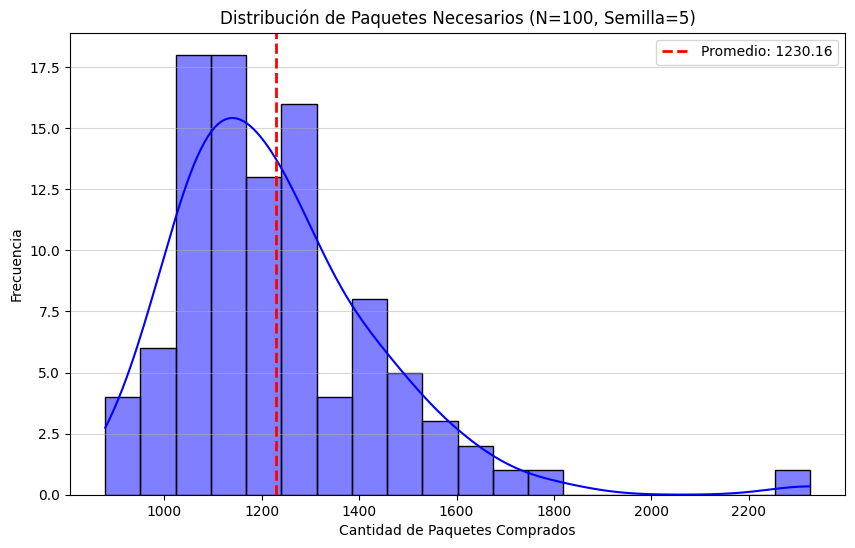

-------------------------------------------------------------------------------------------------------------------------------------------------------------


¡Simulación finalizada! 🎉


In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# ----------------------------------------------------------------------
# Inicio & Bienvenida
# ----------------------------------------------------------------------

print("------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("          ⭐⭐⭐ Bienvenid@ a la SIMULACIÓN DE MONTE CARLO (Qatar 2022) ⭐⭐⭐\n")
print("            El Problema del Coleccionista de Cupones - Coupon Collector's Problem \n")
print("  En el campo de la probabilidad este conocido problema cuantifica cuántos intentos se necesitan, en promedio, para obtener una colección completa.\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# ----------------------------------------------------------------------
# Definición de Parámetros
# ----------------------------------------------------------------------

print("      ...Primero 🩵🤍🩵 🥇 ARGENTINA TRICAMPEÓN 🏆🩵🤍🩵\n\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

print("--- Primero: La definición de Parámetros del Problema ---\n\n")

FIGUS_TOTAL = 860
FIGUS_PAQUETE = 5
N_REPETICIONES = 100

print(f"El álbum de Qatar 2022 de Panini tiene {FIGUS_TOTAL} figuritas.\n")
print(f"Cada paquete trae {FIGUS_PAQUETE} figuritas (sin repetición dentro del paquete según el fabricante).\n")
print(f"La simulación se repetirá N = {N_REPETICIONES} veces para obtener una estimación del promedio.\n")

# ----------------------------------------------------------------------
# EXPERIMENTO ALEATORIO: Funciones Auxiliares
# ----------------------------------------------------------------------

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("\n Segundo: Francia jaja.\n\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- Segundo Paso: Definición de Funciones Auxiliares ---\n\n")


def crear_album(figus_total):
    """Crea un vector (álbum) de figus_total ceros."""
    return np.zeros(figus_total, dtype=int)
print("--> Función 'crear_album': Inicializa el álbum como un vector de ceros (0 = figurita faltante).\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

def comprar_paquete(figus_total, figus_paquete):
    """Genera un paquete de figuritas al azar sin repetición (rd.sample)."""
    return rd.sample(range(figus_total), figus_paquete)

def pegar_figus(album, paquete):
    """Completa con un 1 las figuritas del álbum que hayan tocado."""
    for figu in paquete:
        album[figu] = 1

def album_incompleto(album):
    """Devuelve True si el álbum tiene al menos un cero (está incompleto)."""
    return 0 in album

# ----------------------------------------------------------------------
# EXPERIMENTO ALEATORIO: Función Principal cuantos_paquetes
# ----------------------------------------------------------------------

def cuantos_paquetes(figus_total, figus_paquete):
    """
    Simula el llenado de un álbum y devuelve la cantidad de paquetes comprados.
    """
    album = crear_album(figus_total)
    paquetes_comprados = 0

    # Bucle principal: Comprar paquetes hasta que el álbum esté completo.
    while album_incompleto(album):
        paquete = comprar_paquete(figus_total, figus_paquete)
        pegar_figus(album, paquete)
        paquetes_comprados += 1

    return paquetes_comprados

# ----------------------------------------------------------------------
# MUESTRA ALEATORIA Y CONFIGURACIÓN DE SEMILLA
# ----------------------------------------------------------------------

def simular_albumes(N, figus_total, figus_paquete, semilla):
    """Ejecuta N simulaciones."""
    rd.seed(semilla)
    np.random.seed(semilla)

    # Armar N muestras de cuantos_paquetes.
    muestras = [cuantos_paquetes(figus_total, figus_paquete) for _ in range(N)]
    promedio_estimado = np.mean(muestras)

    return promedio_estimado, muestras

# --- Solicitud de Semilla al Usuario ---
print("--- Tercero: Solicitud de Semilla y Reproducibilidad ---\n\n")


while True:
    try:
        semilla_str = input("Por favor, ingrese la SEMILLA (un número entero) para la simulación: ")
        SEMILLA_ELEGIDA = int(semilla_str)
        break
    except ValueError:
        print("❌ Entrada no válida. Debe ser un número entero. Intente de nuevo.")

print(f"✔️ Semilla de simulación establecida en: {SEMILLA_ELEGIDA}\n\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# Ejecutar la simulación
print("--- Cuarto: Ejecución de la Simulación ---\n\n")
print(f"Ejecutando el experimento {N_REPETICIONES} veces...\n")
promedio_paquetes, muestras = simular_albumes(
    N_REPETICIONES, FIGUS_TOTAL, FIGUS_PAQUETE, SEMILLA_ELEGIDA
)
print(f"Hemos generado {len(muestras)} resultados individuales.\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# ----------------------------------------------------------------------
# DETALLE DE LAS MUESTRAS EN TABLA
# ----------------------------------------------------------------------

print("--- Quinto: Detalle de las Muestras de la Simulación ---\n\n")
print("El vector 'muestras' contiene la cantidad de paquetes necesarios para completar el álbum en cada una de las 100 repeticiones.\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# Mostrar las muestras en bloques de 10
columnas = 10
print("Paquetes necesarios por repetición:")
print("---------------------------------------------------------------")
# Usamos f-strings para formatear la salida en bloques de 10
for i in range(0, N_REPETICIONES, columnas):
    fila = muestras[i:i + columnas]
    # Muestra los 10 valores separados por espacios, alineados a la izquierda
    print(" ".join([f"{n:<5}" for n in fila]))
print("---------------------------------------------------------------")


# ----------------------------------------------------------------------
# CÁLCULO DE PROBABILIDAD TEÓRICA Y SIMULADA
# ----------------------------------------------------------------------

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- Sexto: Cálculo de la Esperanza Teórica y Simulada ---\n\n")
print(f"Esperanza Simulada (Promedio Muestral): **{promedio_paquetes:.2f} paquetes**\n")

# Cálculo Teórico Simplificado
gamma = 0.57721
esperanza_teorica = (FIGUS_TOTAL / FIGUS_PAQUETE) * (math.log(FIGUS_TOTAL) + gamma)

print(f"Esperanza Teórica Aproximada (Modelo Clásico): **{esperanza_teorica:.2f} paquetes**\n\n")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

# ----------------------------------------------------------------------
# TABLA DE PROBABILIDADES
# ----------------------------------------------------------------------

print("--- 📊  Séptimo: Tabla de Probabilidades (Simuladas) ---\n\n")

# 1. Probabilidad Simulada: P(N < Promedio Estimado)
umbral = int(promedio_paquetes) + 1 # Usamos el entero inmediatamente superior al promedio
conteo_exitos = sum(1 for paquetes in muestras if paquetes < umbral)
probabilidad_simulada = conteo_exitos / N_REPETICIONES

# 2. Probabilidad Simulada: P(N > Promedio Estimado)
conteo_fallos = sum(1 for paquetes in muestras if paquetes > umbral)
probabilidad_simulada_mayor = conteo_fallos / N_REPETICIONES

# 3. Probabilidad Simulada: P(N Mínimo)
conteo_minimo = sum(1 for paquetes in muestras if paquetes == min(muestras))
probabilidad_simulada_min = conteo_minimo / N_REPETICIONES

# Impresión
print(" Evento (N = Paquetes Necesarios)                            | Probabilidad Simulada (Frecuencia)")
print("-------------------------------------------------------------|------------------------------------------")
print(f"Completar con menos de {umbral} paquetes                         | {probabilidad_simulada:.2f} ({conteo_exitos}/{N_REPETICIONES})")
print(f"Completar con más de {umbral} paquetes                           | {probabilidad_simulada_mayor:.2f} ({conteo_fallos}/{N_REPETICIONES})")
print(f"Completar con el mínimo ({min(muestras)}) paquetes                       | {probabilidad_simulada_min:.2f} ({conteo_minimo}/{N_REPETICIONES})")


# ----------------------------------------------------------------------
# REPRESENTACIÓN DEL HISTOGRAMA
# ----------------------------------------------------------------------

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")
print("--- Por último: Visualización de Resultados en un Histograma ---\n")
print(" 📈 El histograma muestra la distribución de las 100 muestras.\n\n")

plt.figure(figsize=(10, 6))
sns.histplot(muestras, bins=20, kde=True, color='blue', edgecolor='black')
plt.axvline(promedio_paquetes, color='red', linestyle='dashed', linewidth=2,
            label=f'Promedio: {promedio_paquetes:.2f}')

plt.title(f'Distribución de Paquetes Necesarios (N={N_REPETICIONES}, Semilla={SEMILLA_ELEGIDA})')
plt.xlabel('Cantidad de Paquetes Comprados')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------------------------\n")

print("\n¡Simulación finalizada! 🎉")